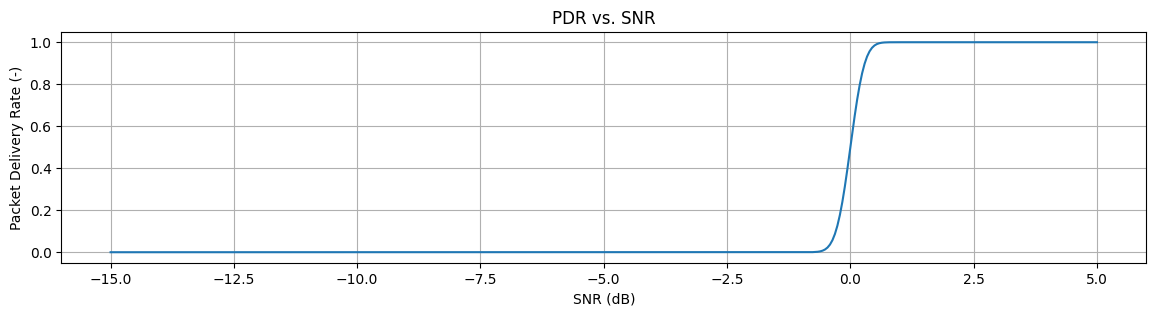

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy

# See https://ieeexplore.ieee.org/document/5452208
# Channel Coding Rate in the Finite Blocklength Regime


CRC_bytes: int = 3
preamble_bytes: int = 8
PDU_bytes: int = 124

total_bits: int = (PDU_bytes + CRC_bytes + preamble_bytes) * 8  # Number of information bits per packet
R: float = 1  # bits per channel use (target rate)
n: int = int(total_bits / R)  # Number of channel uses per packet

SNR_dB: float = np.linspace(-15, 5, 400)
SNR: float = 10 ** (SNR_dB / 10)


# Q function
def qfunc(x: float) -> float:
    return 0.5 - 0.5 * scipy.special.erf(x / np.sqrt(2))


# For AWGN channel, see Eq. (292), multiplied by two for complex signals
def capacity(SNR: float) -> float:
    return np.log2(1 + SNR)


# For AWGN channel, see Eq. (293), multiplied by two for complex signals
def dispersion(SNR: float) -> float:
    return (SNR * (SNR + 2) / (1 + SNR) ** 2) * (np.log2(np.e)) ** 2


# From Eq. (1) in the paper, solved for epsilon = PER
def packet_error_rate(SNR: float, n: int, R: float) -> float:
    C = capacity(SNR)
    V = dispersion(SNR)

    arg = np.sqrt(n) * (C - R) / np.sqrt(V)
    epsilon = qfunc(arg)
    return epsilon


PDR = 1 - packet_error_rate(SNR, n, R)

plt.figure(figsize=(14, 3))
plt.plot(SNR_dB, PDR)
plt.xlabel("SNR (dB)")
plt.ylabel("Packet Delivery Rate (-)")
plt.title("PDR vs. SNR")
plt.grid(True)
plt.show()